# Plot of Metrics (Availability, Pulse Peaks etc.) 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd
import glob
import os
import re
import plotly.colors as pc

base_dir = "/home/gsourpi/git-ldm/ldm/MultiHarp150_V3_1/HPM_TDC_Deadtime_Characterization/updated_setup_with_reference_and_wire_delay/"
computed_metrics_folder = "results"
chosen_metric = "pulse_ratios_with_integrated_counts.txt"


# Filepaths we want the availability from in the "analysis/results" folder
filepaths_of_interest = [
    "fine_scan_850ps_to_5ns_100ps_step_#2/", # 10sec integration 
    "fine_scan_850ps_to_5ns_100ps_step_#3/"  # 60sec integration 
]

file_paths = [ os.path.join(computed_metrics_folder, filepath, chosen_metric) for filepath in filepaths_of_interest ] 

# Define contrasting color palettes
palette_A = pc.sequential.Reds[3:]  
palette_B = pc.sequential.Blues[3:]  

# Filter the scans by iteration (so all scans of "_1" extension, so 1st iteration, in the first position of "scans" list and so on...)
scans = []
for file_of_interest in filepaths_of_interest: 
    scanned_histograms = []
    for i in range(1, 15): 
        hist_names = glob.glob(
                                os.path.join(base_dir, "Data", file_of_interest, f"*_{i}.txt.gz")        
        )
        hist_name = [re.search(r'hist_output_delay_\d+ps_integration_\d+sec_\d+', file_path).group(0) for file_path in hist_names]
        scanned_histograms.append(hist_name) 
    scans.append(scanned_histograms)

# Initialize figures
fig1 = go.Figure() 
fig2 = go.Figure()
fig3 = go.Figure()
fig4 = go.Figure()

# Loop through file paths with different color schemes
for idx, file_path in enumerate(file_paths): 
    color_palette = palette_A if idx == 0 else palette_B  # Alternate color palettes
    for scan_names in scans: 
        for scan_idx, scan_name in enumerate(scan_names):

            col_names = [
                "pump_ratio",
                "probe_ratio",
                "delay_bins",
                "histogram_name",
                "pump_height",
                "probe_height",
                "ref_pump_height",
                "ref_probe_height"
            ]

            # Read the file, skipping the 1-line header
            data = pd.read_csv(
                file_path,
                sep=" ",        
                skiprows=1,      
                header=None,     
                names=col_names  
            )

            # Filter data based on histogram_name
            filtered_data = data[data["histogram_name"].isin(scan_name)].reset_index(drop=True)

            if not filtered_data.empty:  
                pump_ratio       = filtered_data["pump_ratio"]
                probe_ratio      = filtered_data["probe_ratio"]
                delay_bins       = filtered_data["delay_bins"]
                histogram_name   = filtered_data["histogram_name"]
                pump_height      = filtered_data["pump_height"]/max(filtered_data["pump_height"])
                probe_height     = filtered_data["probe_height"]/max(filtered_data["probe_height"])
                ref_pump_height  = filtered_data["ref_pump_height"]
                ref_probe_height = filtered_data["ref_probe_height"]

                time_ps = delay_bins * 5  # Ensure delay_bins is from filtered data

                # Choose color from palette
                color = color_palette[scan_idx % len(color_palette)]
                if idx+1 == 1:
                    label_of_scan = "10sec DAQ" 
                else: 
                    label_of_scan = "60sec DAQ" 
                # Add traces with chosen color
                fig1.add_trace(go.Scatter(x=time_ps, y=pump_ratio, mode='markers', marker=dict(color=color), name=f"{label_of_scan} - Iteration {scan_idx}"))
                fig1.update_layout(title="Pump Ratio (Counts of pump / Counts of ref pump)")

                fig2.add_trace(go.Scatter(x=time_ps, y=probe_ratio, mode='markers', marker=dict(color=color), name=f"{label_of_scan} - Iteration {scan_idx}"))
                fig2.update_layout(title="Probe Ratio (Counts of probe / Counts of ref probe)")

                fig3.add_trace(go.Scatter(x=time_ps, y=pump_height, mode='markers', marker=dict(color=color), name=f"{label_of_scan} - Iteration {scan_idx}"))
                fig3.update_layout(title="Pump Height (Counts of ref pump peak) normalized by the maximum count")

                fig4.add_trace(go.Scatter(x=time_ps, y=probe_height, mode='markers', marker=dict(color=color), name=f"{label_of_scan} - Iteration {scan_idx}"))
                fig4.update_layout(title="Probe Height (Counts of ref probe peak) normalized by the maximum count")

# Show plots
fig1.show()
fig2.show()
fig3.show()
fig4.show()


/tmp/gsourpi/ipykernel_1358901/1971147654.py:16: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



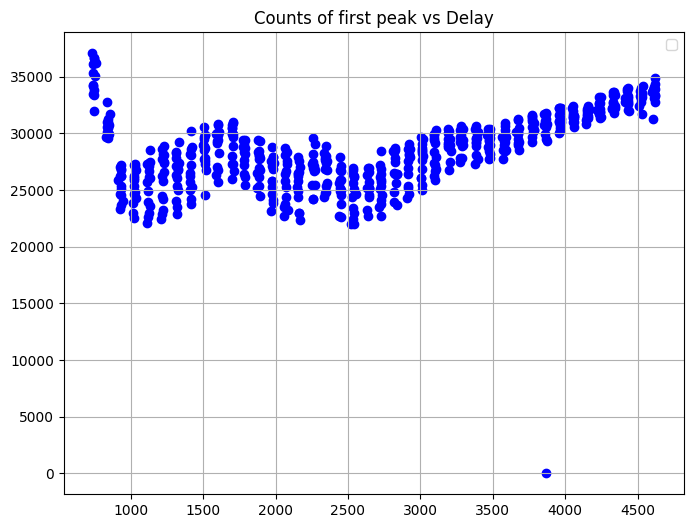

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


file_path = "results/fine_scan_850ps_to_5ns_100ps_step_#2/one_peak_count_testing.txt"
data = pd.read_csv(file_path, sep=" ", skiprows=1, header=None, names=["integrated_counts_of_peak", "counts_from_single_peak", "delay_bins", "hist_name"])

counts_from_isol_peak = data["integrated_counts_of_peak"]
counts_from_mean = data["counts_from_single_peak"]
delay_bins = data["delay_bins"]

plt.figure(figsize=(8, 6))
plt.scatter(delay_bins*5, counts_from_mean, marker='o', linestyle='-', color='b', label="")
plt.title("Counts of first peak vs Delay")
plt.legend()
plt.grid()
plt.show()

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

acq_time = [10*i for i,_ in enumerate(counts_from_isol_peak)]

plt.figure(figsize=(8, 6))
plt.scatter(acq_time, counts_from_isol_peak/max(counts_from_isol_peak), marker='o', linestyle='-', color='b', label="")
plt.ylim(0.975,1.005)
plt.legend()
plt.grid()
plt.show()

/tmp/gsourpi/ipykernel_1274400/4187316439.py:10: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 

hist_filepath = "/home/gsourpi/git-ldm/ldm/MultiHarp150_V3_1/HPM_TDC_Deadtime_Characterization/updated_setup_with_refernce_and_wire_delay/Data/scan_from_6n_to_1n_10sec_integration"
files = os.listdir(hist_filepath)
# hist_name = os.path.splitext(histogram_name)[0]
max_counts_from_probe = []
for file in files: 
    try: 
        file_path = os.path.join(hist_filepath, file)

        data = pd.read_csv(file_path, sep='\s+', header=None)
        non_zero_columns = (data != 0).any()
        data = data.loc[:, non_zero_columns]
        time_ps = np.arange(len(data))

        histograms = {col: data[col].tolist() for col in data.columns}

        #ref_hist      = np.array(histograms[list(histograms.keys())[0]])
        delay_hist    = np.array(histograms[list(histograms.keys())[1]])
        #detector_hist = np.array(histograms[list(histograms.keys())[2]])

        max_counts_from_probe.append([sum(delay_hist), file]) 
    except Exception as e: 
        print(e, file)

counts, delay = [], []
import re
# variation is 10^(-7) times weaker than our actual number of counts (the PCB fires every time) 
for i, pair in enumerate(max_counts_from_probe): 
    counts.append(pair[0])
    delay.append(re.search(r'hist_output_delay_(\d+)ps', max_counts_from_probe[i][1]).group(1))
counts= np.array(counts)
plt.figure(figsize=(8, 6))
plt.scatter(delay, counts/6e8, marker='o', linestyle='-', color='r', label="")
plt.legend()
plt.grid()
plt.show()

/tmp/gsourpi/ipykernel_2480640/1958162880.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


In [19]:
import numpy as np
import plotly.graph_objects as go
import pandas as pd

file_path = "results/scan_500ps_to_7500ps_1hour_integration/sent_to_measured_pulse_ratio.txt"

col_names = [
    "Detection_Efficiency",  # New column 1
    "Delay (bins)",          # New column 2
    "Delay (ps)"             # New column 3 (calculated)
]

data = pd.read_csv(
    file_path,
    sep="\s+",         # Adjust if tab-separated
    skiprows=1,      # Skip the header line
    header=None,     # No automatic header
    names=col_names[:2]  # Read only the first 2 columns
)

data["Delay (ps)"] = data["Delay (bins)"] * 5

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=data["Delay (ps)"], 
    y=data["Detection_Efficiency"], 
    mode='markers',
    name="Detection Efficiency"
))

fig.update_layout(
    title="Sent_to_measured_pulse_ratio vs. Delay",
    xaxis_title="Delay (ps)",
    yaxis_title="Detection Efficiency",
    template="plotly_white"
)

fig.show()


# Past data 

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000]


/tmp/gsourpi/ipykernel_937594/745033383.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


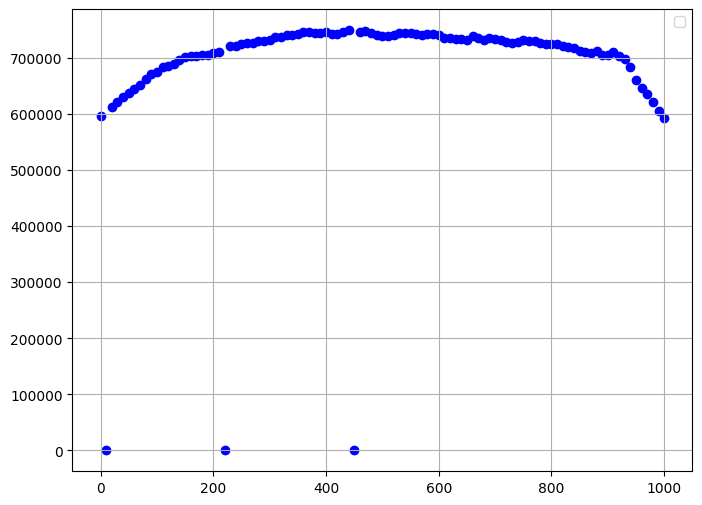

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

file_path = "analysis/results/probe_testing.txt"
data = pd.read_csv(file_path, sep=" ", skiprows=1, header=None, names=["counts_from_isol_peak", "counts_from_mean", "delay_bins", "hist_name"])

counts_from_isol_peak = data["counts_from_mean"]
acq_time = [10*i for i,_ in enumerate(counts_from_isol_peak)]
print(acq_time)

plt.figure(figsize=(8, 6))
plt.scatter(acq_time, counts_from_isol_peak, marker='o', linestyle='-', color='b', label="")
plt.legend()
plt.grid()
plt.show()

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

file_path = "analysis/results/probe_testing.txt"
data = pd.read_csv(file_path, sep=" ", skiprows=1, header=None, names=["counts_from_isol_peak", "counts_from_mean", "delay_bins"])

counts_from_isol_peak = data["counts_from_isol_peak"]
counts_from_mean = data["counts_from_mean"]
delay_bins = data["delay_bins"]

plt.figure(figsize=(8, 6))
plt.scatter(delay_bins*5, counts_from_isol_peak, marker='o', linestyle='-', color='b', label="")
plt.legend()
plt.grid()
plt.show()

/tmp/gsourpi/ipykernel_937594/2995592692.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


/tmp/gsourpi/ipykernel_937594/812588732.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


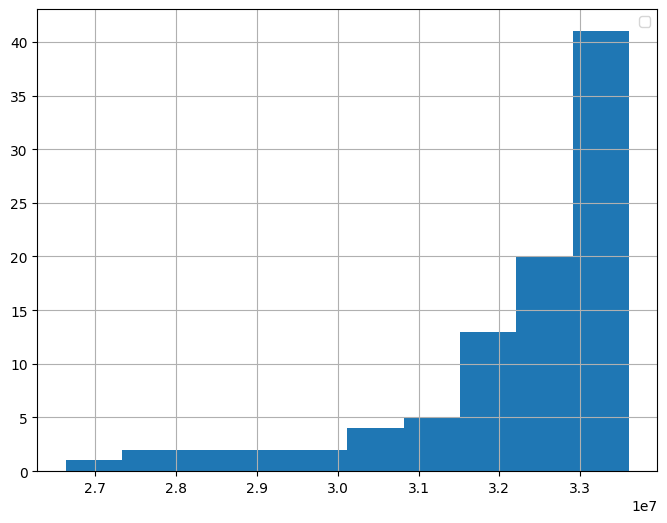

In [51]:
file_path = "analysis/results/probe_testing.txt"
data = pd.read_csv(file_path, sep=" ", skiprows=1, header=None, names=["counts_from_isol_peak", "counts_from_mean", "delay_bins"])

counts_from_isol_peak = data["counts_from_isol_peak"]
counts_from_mean = data["counts_from_mean"]
delay_bins = data["delay_bins"]

counts_from_isol_peak = np.array(counts_from_isol_peak)
counts_from_isol_peak = counts_from_isol_peak[counts_from_isol_peak >1e7]

plt.figure(figsize=(8, 6))
plt.hist(counts_from_isol_peak)
plt.legend()
#plt.xlim(2.5e7,3.5e7)
plt.grid()
plt.show()

/tmp/gsourpi/ipykernel_937594/680343839.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


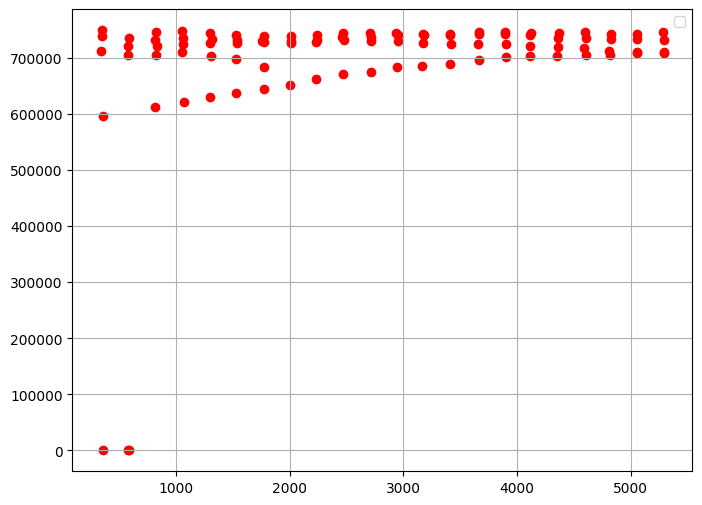

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(delay_bins*5, counts_from_mean, marker='o', linestyle='-', color='r', label="")
plt.legend()
plt.grid()
plt.show()

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 

hist_filepath = "/home/gsourpi/git-ldm/ldm/MultiHarp150_V3_1/HPM_TDC_Deadtime_Characterization/histograms"
files = os.listdir(hist_filepath)
# hist_name = os.path.splitext(histogram_name)[0]
max_counts_from_probe = []
for file in files: 
    try: 
        file_path = os.path.join(hist_filepath, file)

        data = pd.read_csv(file_path, sep='\s+', header=None)
        non_zero_columns = (data != 0).any()
        data = data.loc[:, non_zero_columns]
        time_ps = np.arange(len(data))

        histograms = {col: data[col].tolist() for col in data.columns}

        #ref_hist      = np.array(histograms[list(histograms.keys())[0]])
        delay_hist    = np.array(histograms[list(histograms.keys())[1]])
        #detector_hist = np.array(histograms[list(histograms.keys())[2]])

        max_counts_from_probe.append([sum(delay_hist), file]) 
    except Exception as e: 
        print(e, file)
    

In [37]:
counts, delay = [], []
import re
# variation is 10^(-7) times weaker than our actual number of counts (the PCB fires every time) 
for i, pair in enumerate(max_counts_from_probe): 
    counts.append(pair[0])
    delay.append(re.search(r'hist_output_delay_(\d+)ps', max_counts_from_probe[i][1]).group(1))
counts= np.array(counts)
plt.figure(figsize=(8, 6))
plt.scatter(delay, counts/6e8, marker='o', linestyle='-', color='r', label="")
plt.legend()
plt.grid()
plt.show()

/tmp/gsourpi/ipykernel_937594/262138617.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
